The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class1D

The data folder "_data_temp/convergence_analysis4/" does not exist. Creating new folder.
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class1D/_data_temp/convergence_analysis4/
The MFI grid was: 
xmin= -6.0  xmax= 6.0  nx= 501

The new PLUMED grid is: 
pl_xmin= -7.01  pl_xmax= 7.01  pl_nx= 585


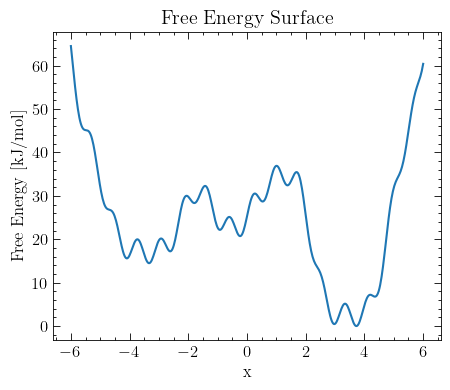

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os
import time

# Import the MFI library 
import MFI_lib1D as lib1
import MFI_class1D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_temp/convergence_analysis4/"): print("\nThe data folder \"_data_temp/convergence_analysis4/\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_temp/convergence_analysis4/"); 
    path_data = path_notebook + "/_data_temp/convergence_analysis4/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})


# Load the grid, the FES, and the PLUMED grid. Change n_surf to select the surface.  
for _surf_parameters_ in [0]:
    [grid, y_list, y_string_list] = lib1.load_pkl(path_notebook + "/fes_list_1D")
    FES_cutoff_list = [30, 40, 40, 50, 50, 80, 60, 70, 70, 80, 80, 90, 80, 90, 90, 100, 100, 100, 110, 110]
    n_surf = 4
    y = y_list[n_surf]
    FES_cutoff = FES_cutoff_list[n_surf]
    y_string = y_string_list[n_surf]  
    plumed_dat_text = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x FUNC=({y_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
    dx, dy = grid[1] - grid[0], np.gradient(y, grid[1] - grid[0]) 
    [pl_x, pl_min, pl_max, pl_n, pl_ext] = lib1.get_plumed_grid_1D(grid, -7, 7, print_info=True)
    plt.figure(figsize=(5,4)); plt.plot(grid, y); plt.xlabel("x"); plt.ylabel("Free Energy [kJ/mol]"); plt.title("Free Energy Surface"); plt.show()

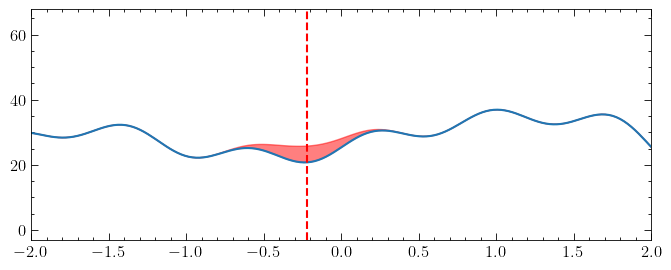

In [41]:
## Investigate the Gaussian volume of 2D Gaussians vs Area of 1D Gaussians, and how they fill a box

# grid = np.linspace(-3, 3, 100); 
# X, Y = np.meshgrid(grid, grid)

# ## make function to return 2D Gaussian, with input, X Y meshgrid, and parameters, mu_x, mu_y, sigma_x, sigma_y, A
# def gauss2D(X, Y, mu_x, mu_y, sigma_x, sigma_y, A): return A * np.exp(-((X - mu_x)**2/(2*sigma_x**2) + (Y - mu_y)**2/(2*sigma_y**2)))

# ## make function to return the area underneath a surface, with input, X Y meshgrid, and Z surface
# def area2D(X, Y, Z): return np.sum(Z) * (X[0,1] - X[0,0]) * (Y[1,0] - Y[0,0])

# Amp = 1; sx = 0.186; sy = 0.186; mx = 0; my = 0; 
# G = gauss2D(X, Y, mx, my, sx, sy, Amp)
# V = area2D(X, Y, G)

# print(f"Volume under the Gaussian is {V:.4f}")
# print(f"V theorectical is {Amp * 2 * np.pi * sx * sy:.4f}")
# # plt.contourf(X, Y, G); 
# # plt.colorbar(); plt.show()

# # V_total is a box of 3x3x20 = 180
# V_total = 5 * 5 * 20 * (1/3)
# n_G = V_total / V
# print(f"Number of Gaussians to fill the box is {n_G:.4f}")



## make function to return 1D Gaussian, with input, X Y meshgrid, and parameters, mu_x, mu_y, sigma_x, sigma_y, A
def gauss1D(X, mu_x, sigma_x, A): return A * np.exp(-((X - mu_x)**2/(2*sigma_x**2)))

## make function to return the area underneath a 1D curve y(x), with input, x, y
def area1D(x, y): return np.sum(y) * (x[1] - x[0])

Amp = 5; s = 0.2; mx = -0.22;
g = gauss1D(grid, mx, s, Amp)
a = area1D(grid, g)

plt.figure(figsize=(8,3));
plt.plot(grid, y)
plt.axvline(-0.22, color="red", linestyle="--")
plt.fill_between(grid, y, y+g, color="red", alpha=0.5)
# plt.plot(grid, y+g)
# plt.plot(grid, g); 
# plt.ylim(0, 10)
plt.xlim(-2,2)
plt.show()

# print(f"\n\nArea under the Gaussian is {a:.4f}")
# print(f"A theorectical is {Amp * np.sqrt(2 * np.pi) * sx:.4f}")

# A_total = 12 * 50 * (1/2)
# n_g = A_total / a
# print(f"Number of Gaussians to fill the box is {n_g:.4f}")


#### Define default parameters

In [12]:
os.chdir(path_notebook); reload(MFI_class1D); reload(lib1); pass

In [16]:
default_params = {	"grid":grid, "y":y, "bw":dx*1.5, "periodic":False, #"dy":dy, # "initial_position":[0,0], 
					"System":"Langevin", "plumed_dat_text":plumed_dat_text, "pl_grid":pl_x, "simulation_steps": 1_000_000, 
					"position_pace":20, "metad_pace":200, "n_pos_per_window":10, 
     				"metad_width":0.1, "metad_height":1, "biasfactor":20 , 
         			"Bias_sf":1, "gaus_filter_sigma":None, 
                    "len_error_list":100, 
					"FES_cutoff":FES_cutoff, "calculate_FES_st_dev":False, "bootstrap_iter":None, "record_forces_e":True, "save_error_progression":True,
     				"simulation_folder_path": path_data, "print_info": False}

### Run Long simulation for reference

In [67]:
# Run 100 long simulations
long_sim_params = {**default_params}

t_collection, aofe_collection, aad_collection = [], [], []

for i_sim in range(1,101):
    
    sim_ID = f"_long_{i_sim}"
    long_sim_params.update({"ID":sim_ID})
    
    if os.path.isfile(path_data + f"error_progression{sim_ID}.pkl"):
        print(f"Simulation {i_sim} (exists)", end=" | ")
        t, aofe, aad = lib1.load_pkl(path_data + f"error_progression{sim_ID}.pkl")
    else:
        print(f"Simulation {i_sim}", end=" | ")
        MFI_long = MFI_class1D.MFI1D(**long_sim_params)
        if not os.path.isfile(path_data + f"position{sim_ID}"): MFI_long.run_simulation()
        MFI_long.analyse_data()
        t, aofe, aad = MFI_long.Avr_Error_list[:,0], MFI_long.Avr_Error_list[:,2], MFI_long.Avr_Error_list[:, MFI_long.aad_index]
                
    t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad)
    print(f"Final Error: Aofe = {aofe[-1]:.4f}, AAD = {aad[-1]:.4f}, (AAD at 10% = {aad[10]:.4f})")
    if i_sim % 5 == 0: 
        aad_avr = np.mean(aad_collection, axis=0)
        print(f"--- Mean of final AAD: {aad_avr[-1]:.4f}, (10% = {aad_avr[10]:.4f})")       



Simulation 1 (exists) | Final Error: Aofe = 1.5595, AAD = 0.3248, (AAD at 10% = 10.6202)
Simulation 2 (exists) | Final Error: Aofe = 1.5721, AAD = 0.2764, (AAD at 10% = 2.3834)
Simulation 3 (exists) | Final Error: Aofe = 1.5766, AAD = 0.2795, (AAD at 10% = 0.6710)
Simulation 4 (exists) | Final Error: Aofe = 1.5706, AAD = 0.3110, (AAD at 10% = 0.7003)
Simulation 5 (exists) | Final Error: Aofe = 1.5713, AAD = 0.4185, (AAD at 10% = 12.0551)
--- Mean of final AAD: 0.3220, (10% = 5.2860)
Simulation 6 (exists) | Final Error: Aofe = 1.5768, AAD = 0.3815, (AAD at 10% = 1.4042)
Simulation 7 (exists) | Final Error: Aofe = 1.5851, AAD = 0.3755, (AAD at 10% = 11.1850)
Simulation 8 (exists) | Final Error: Aofe = 1.5688, AAD = 0.2607, (AAD at 10% = 10.7590)
Simulation 9 (exists) | Final Error: Aofe = 1.5449, AAD = 0.2411, (AAD at 10% = 0.9462)
Simulation 10 (exists) | Final Error: Aofe = 1.5907, AAD = 0.2173, (AAD at 10% = 11.7620)
--- Mean of final AAD: 0.3086, (10% = 6.2486)
Simulation 11 (exists)

Mean Final AAD: 0.3147 +- 0.0080


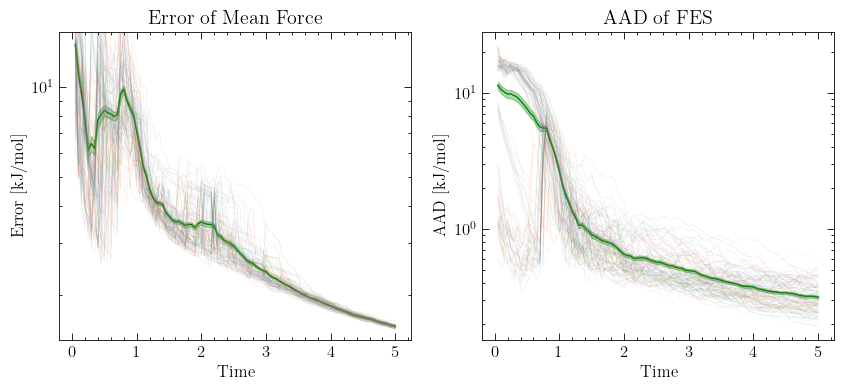

In [68]:
# Statistical Analysis of 100 long simulations
t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
t = t_collection[0]

time_long, mean_ofe_long, ste_ofe_long, mean_aad_long, ste_aad_long = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, return_results=True, plot=False, plot_log=True)
plt.subplot(1,2,1) 
for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
plt.subplot(1,2,2)
for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)

print(f"Mean Final AAD: {mean_aad_long[-1]:.4f} +- {ste_aad_long[-1]:.4f}")
plt.show()


### Exploration simulation

In [20]:
# Run 100 exploration simulations
expl_sim_params = {**default_params}
expl_sim_params.update({"save_error_progression":True})#, "n_pos":2_500})
expl_sim_params.update({"simulation_steps":100_000, "metad_height":5, "metad_width":0.2, "biasfactor":200, "len_error_list":25})

t_collection, aofe_collection, aad_collection = [], [], []

for i_sim in range(1,101):
    
    sim_ID = f"_expl_{i_sim}"
    expl_sim_params.update({"ID":sim_ID})
    
    if os.path.isfile(path_data + f"error_progression{sim_ID}.pkl"):
        print(f"Simulation {i_sim} (exists)", end=" | ")
        t, aofe, aad = lib1.load_pkl(path_data + f"error_progression{sim_ID}.pkl")
        
        # # if t.shape == 100, make it 25
        # if t.shape[0] == 100:
        #     t = t[::4]; aofe = aofe[::4]; aad = aad[::4]
        #     lib1.save_pkl(np.array([t, aofe, aad]), path_data + f"error_progression{sim_ID}.pkl")
    else:
        print(f"Simulation {i_sim}", end=" | ")
        MFI_expl = MFI_class1D.MFI1D(**expl_sim_params)
        if not os.path.isfile(path_data + f"position{sim_ID}"): MFI_expl.run_simulation()
        MFI_expl.analyse_data()
        t, aofe, aad = MFI_expl.Avr_Error_list[:,0], MFI_expl.Avr_Error_list[:,2], MFI_expl.Avr_Error_list[:, MFI_expl.aad_index]

    t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad)
    print(f"Final Error: Aofe = {aofe[-1]:.4f}, AAD = {aad[-1]:.4f}")
    if i_sim % 5 == 0: print(f"--- Mean of final AAD: {np.mean(aad_collection, axis=0)[-1]:.4f}")       


Simulation 1 (exists) | Final Error: Aofe = 4.9424, AAD = 1.3917
Simulation 2 (exists) | Final Error: Aofe = 4.7962, AAD = 1.1650
Simulation 3 (exists) | Final Error: Aofe = 4.8882, AAD = 1.2159
Simulation 4 (exists) | Final Error: Aofe = 4.9957, AAD = 3.4544
Simulation 5 (exists) | Final Error: Aofe = 4.8793, AAD = 2.0044
--- Mean of final AAD: 1.8463
Simulation 6 (exists) | Final Error: Aofe = 4.7307, AAD = 1.3790
Simulation 7 (exists) | Final Error: Aofe = 4.9127, AAD = 1.5286
Simulation 8 (exists) | Final Error: Aofe = 4.9718, AAD = 3.3633
Simulation 9 (exists) | Final Error: Aofe = 4.8082, AAD = 1.1389
Simulation 10 (exists) | Final Error: Aofe = 4.7803, AAD = 1.6618
--- Mean of final AAD: 1.8303
Simulation 11 (exists) | Final Error: Aofe = 4.9667, AAD = 1.7015
Simulation 12 (exists) | Final Error: Aofe = 4.9740, AAD = 2.1947
Simulation 13 (exists) | Final Error: Aofe = 4.8346, AAD = 1.6803
Simulation 14 (exists) | Final Error: Aofe = 4.9879, AAD = 1.3997
Simulation 15 (exists) | 

Mean Final AAD: 1.6510 +- 0.0482


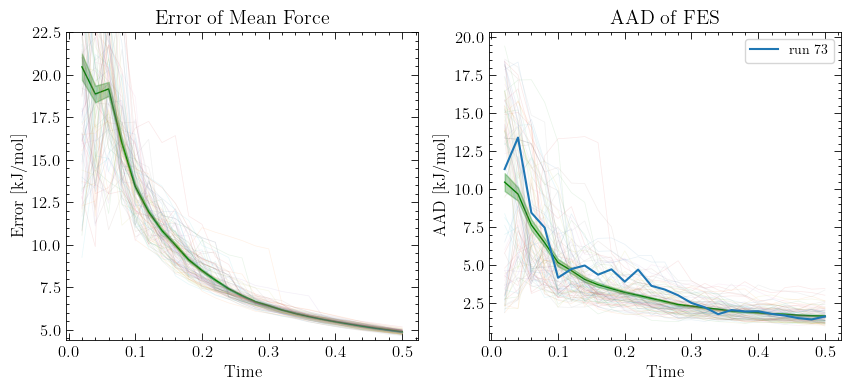

In [21]:
# Statistical Analysis of 100 exploration simulations
t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
t = t_collection[0]

time_expl, mean_ofe_expl, ste_ofe_expl, mean_aad_expl, ste_aad_expl = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, 
                                                                                                        return_results=True, plot=False, plot_log=False)
plt.subplot(1,2,1) 
for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
plt.subplot(1,2,2)
for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)

print(f"Mean Final AAD: {mean_aad_expl[-1]:.4f} +- {ste_aad_expl[-1]:.4f}")

plt.plot(t, aad_collection[37-1], label="run 73")
plt.legend(fontsize=10)
plt.show()


Simulation 1 | Simulation 2 | Simulation 3 | Simulation 4 | Simulation 5 | 


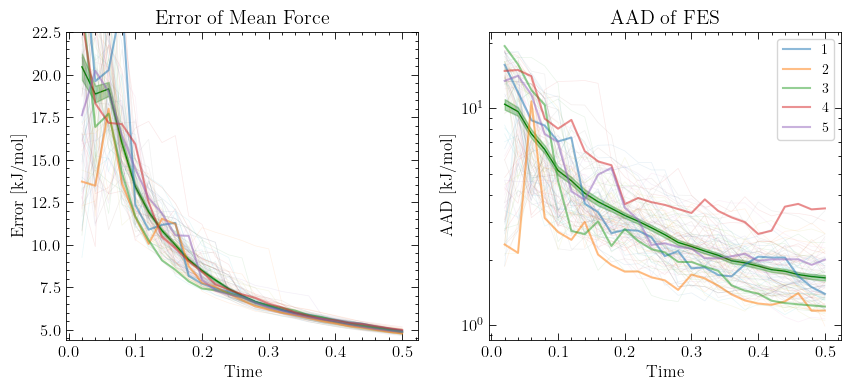

Simulation 6 | Simulation 7 | Simulation 8 | Simulation 9 | Simulation 10 | 


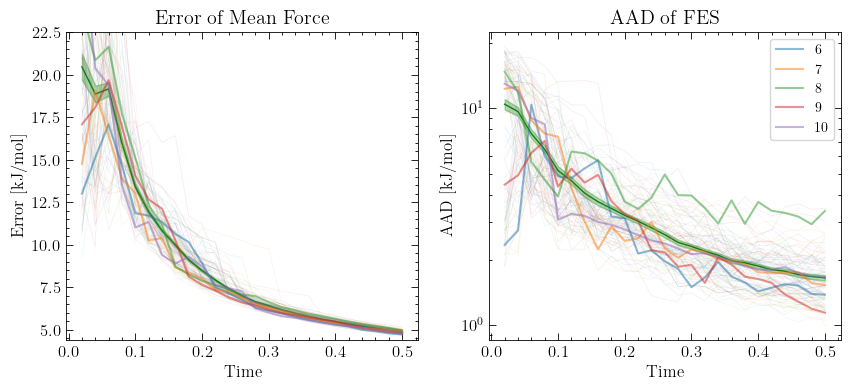

Simulation 11 | Simulation 12 | Simulation 13 | Simulation 14 | Simulation 15 | 


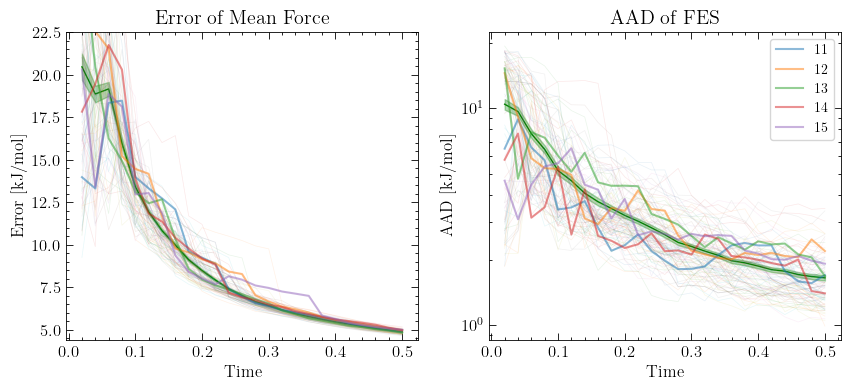

Simulation 16 | Simulation 17 | Simulation 18 | Simulation 19 | Simulation 20 | 


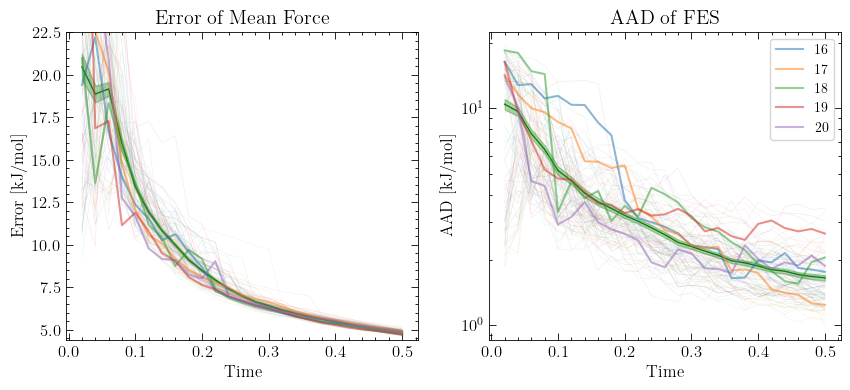

Simulation 21 | Simulation 22 | Simulation 23 | Simulation 24 | Simulation 25 | 


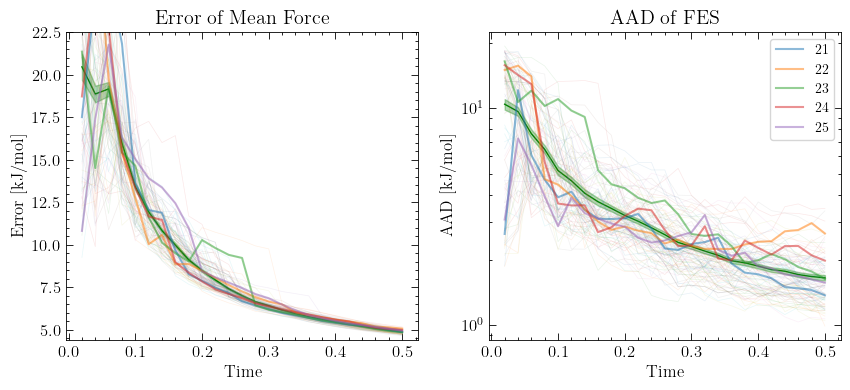

Simulation 26 | Simulation 27 | Simulation 28 | Simulation 29 | Simulation 30 | 


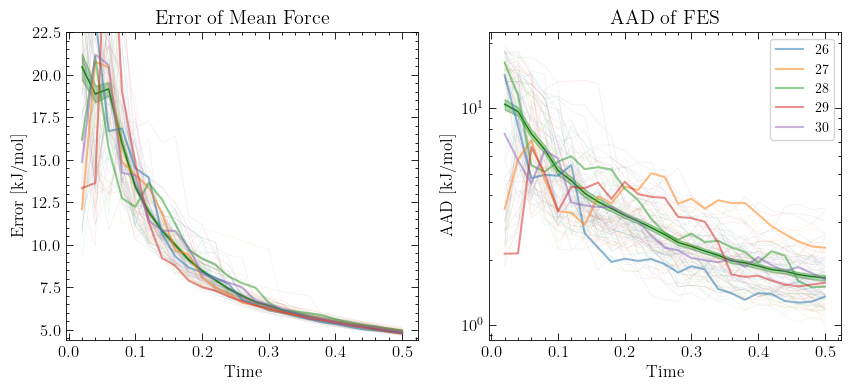

Simulation 31 | Simulation 32 | Simulation 33 | Simulation 34 | Simulation 35 | 


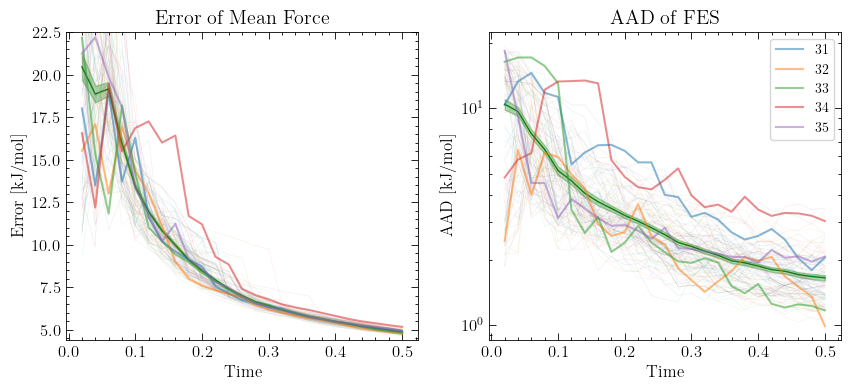

Simulation 36 | Simulation 37 | Simulation 38 | Simulation 39 | Simulation 40 | 


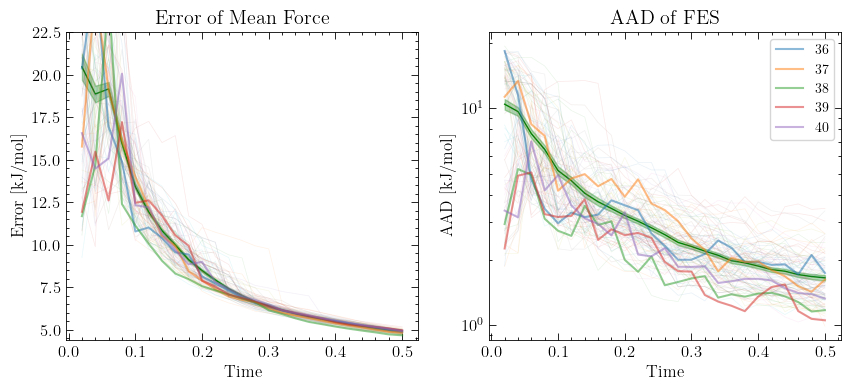

Simulation 41 | Simulation 42 | Simulation 43 | Simulation 44 | Simulation 45 | 


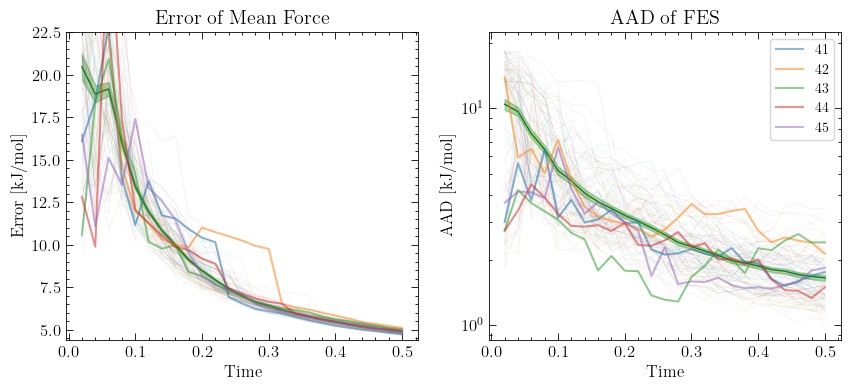

Simulation 46 | Simulation 47 | Simulation 48 | Simulation 49 | Simulation 50 | 


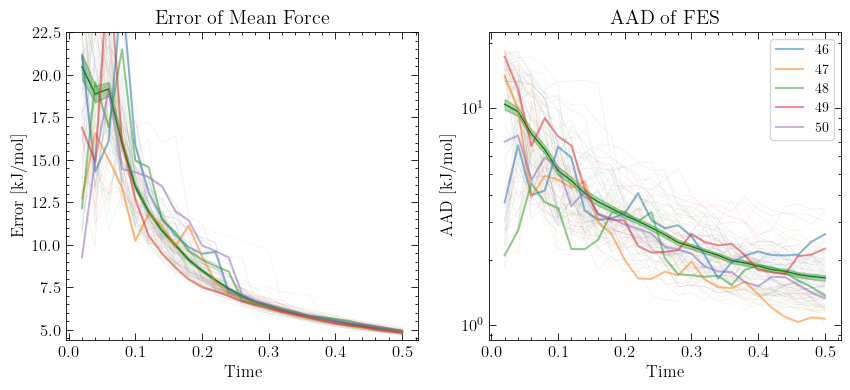

Simulation 51 | Simulation 52 | Simulation 53 | Simulation 54 | Simulation 55 | 


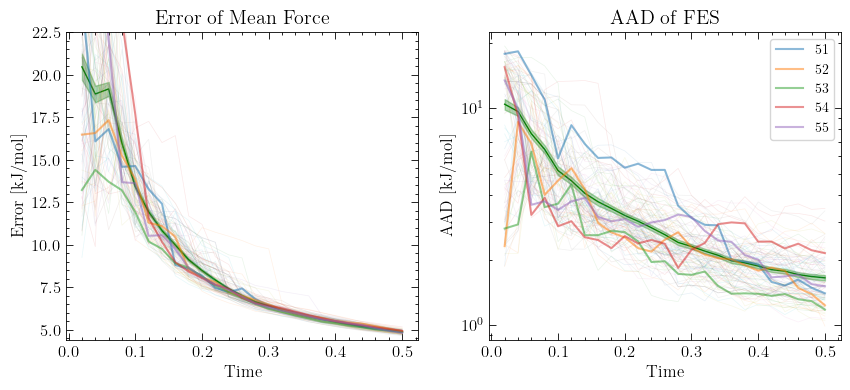

Simulation 56 | Simulation 57 | Simulation 58 | Simulation 59 | Simulation 60 | 


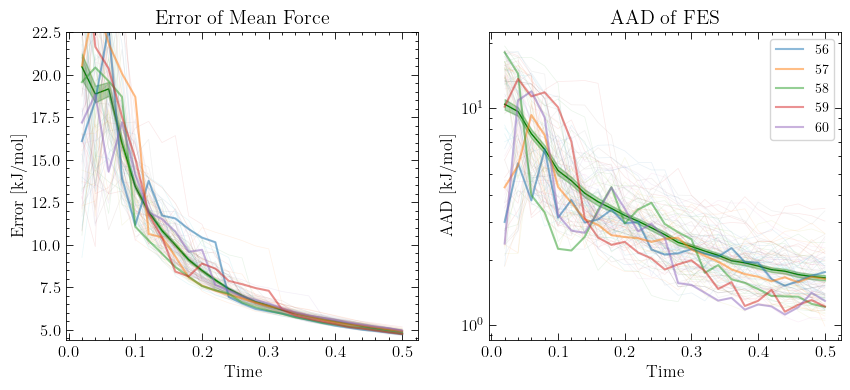

Simulation 61 | Simulation 62 | Simulation 63 | Simulation 64 | Simulation 65 | 


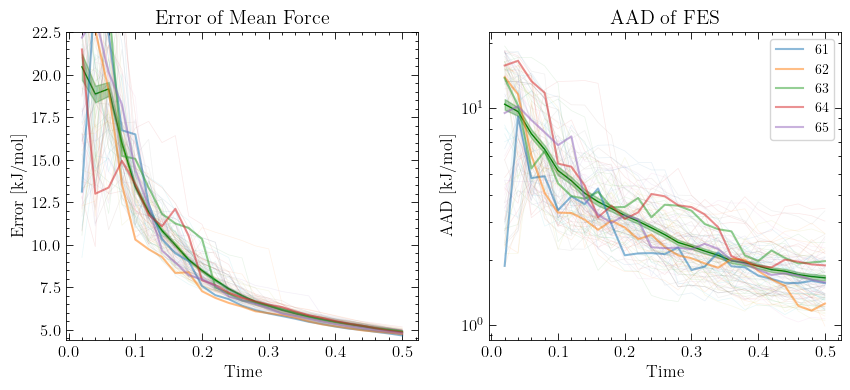

Simulation 66 | Simulation 67 | Simulation 68 | Simulation 69 | Simulation 70 | 


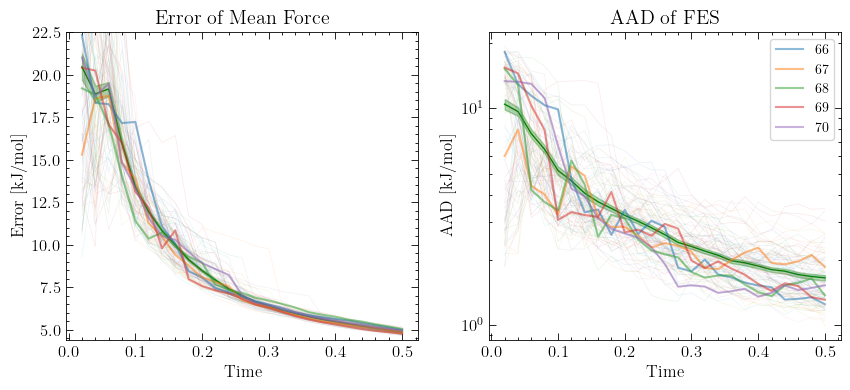

Simulation 71 | Simulation 72 | Simulation 73 | Simulation 74 | Simulation 75 | 


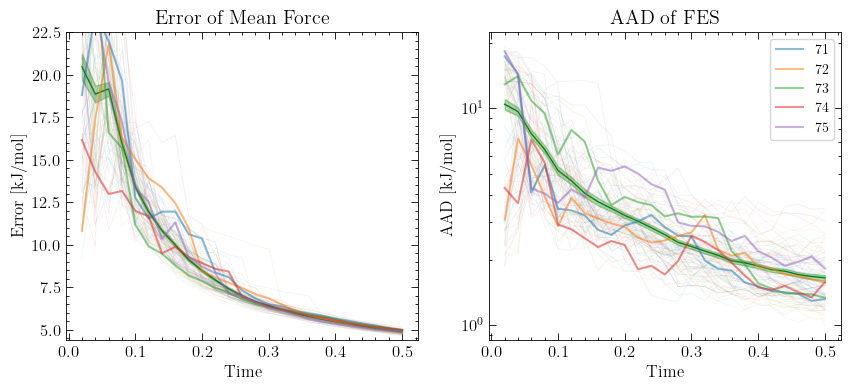

Simulation 76 | Simulation 77 | Simulation 78 | Simulation 79 | Simulation 80 | 


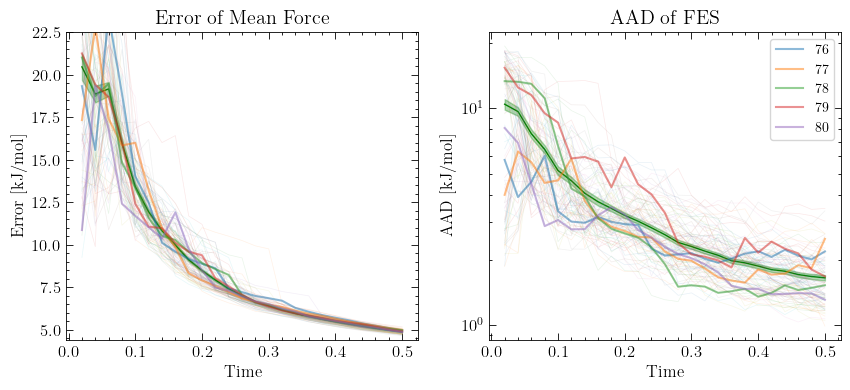

Simulation 81 | Simulation 82 | Simulation 83 | Simulation 84 | Simulation 85 | 


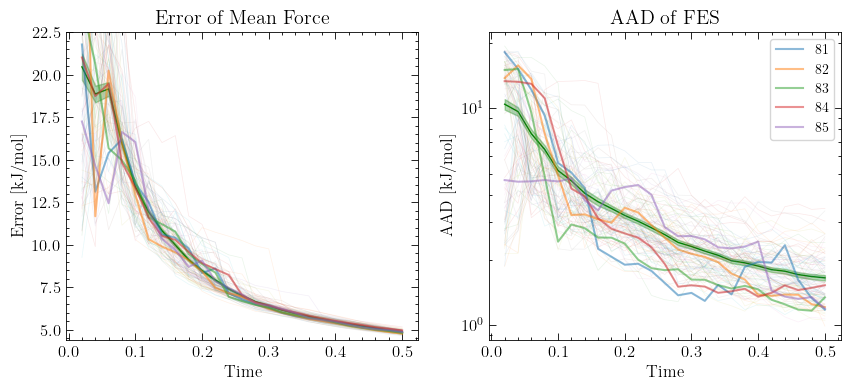

Simulation 86 | Simulation 87 | Simulation 88 | Simulation 89 | Simulation 90 | 


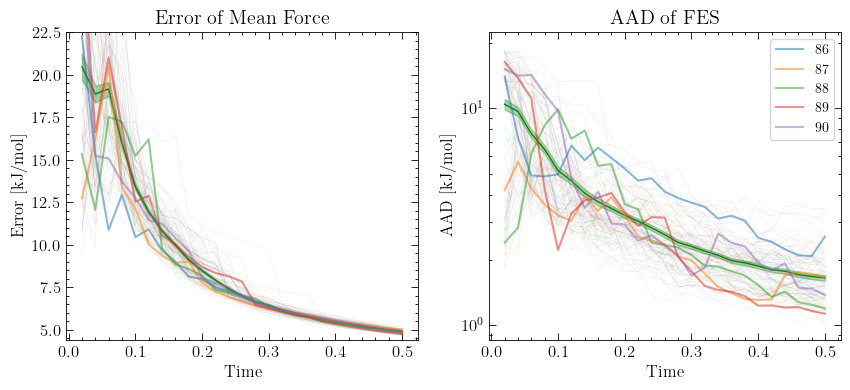

Simulation 91 | Simulation 92 | Simulation 93 | Simulation 94 | Simulation 95 | 


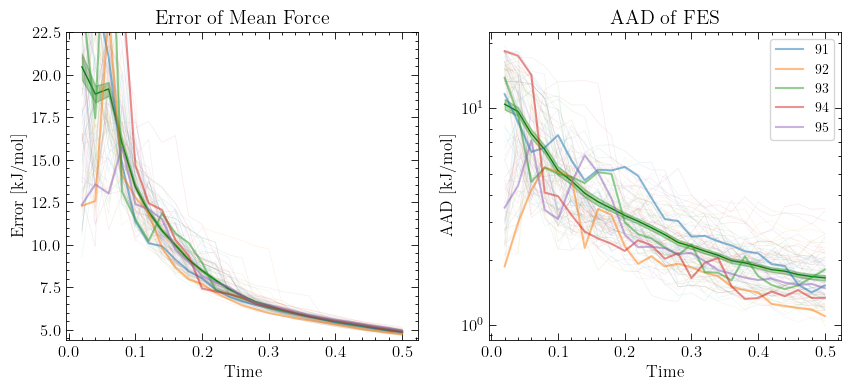

Simulation 96 | Simulation 97 | Simulation 98 | Simulation 99 | Simulation 100 | 


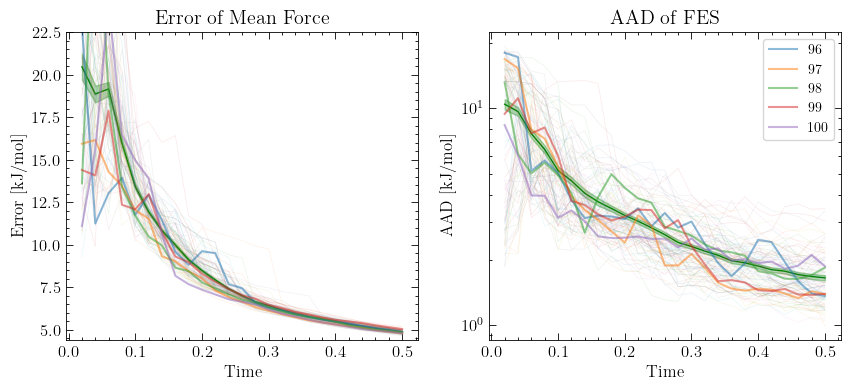

In [15]:
# # Plot all exploration simulations to find a representative one to use for metad stage
# t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
# t = t_collection[0]

# for j in range(1, 21):
    
#     time_expl, mean_ofe_expl, ste_ofe_expl, mean_aad_expl, ste_aad_expl = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, return_results=True, plot=False, plot_log=False)
#     plt.subplot(1,2,1) 
#     for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
#     plt.subplot(1,2,2)
#     for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)    
    
#     for jj in range((j-1)*5, (j)*5):
        
#         print(f"Simulation {jj+1}", end=" | ")
        
#         plt.subplot(1,2,1)
#         plt.plot(t, aofe_collection[jj], label=f"{jj+1}", alpha=0.5)
#         plt.subplot(1,2,2)
#         plt.plot(t, aad_collection[jj], label=f"{jj+1}", alpha=0.5)
    
#     print("")    
#     plt.legend(fontsize=10)
#     plt.yscale("log")
#     plt.show() 
                                                                                                        

Final Error: Aofe = 4.8439, AAD = 1.6185
MIN(FES+Bias) = 92.6802, MIN(Z+Bias) = 92.1711


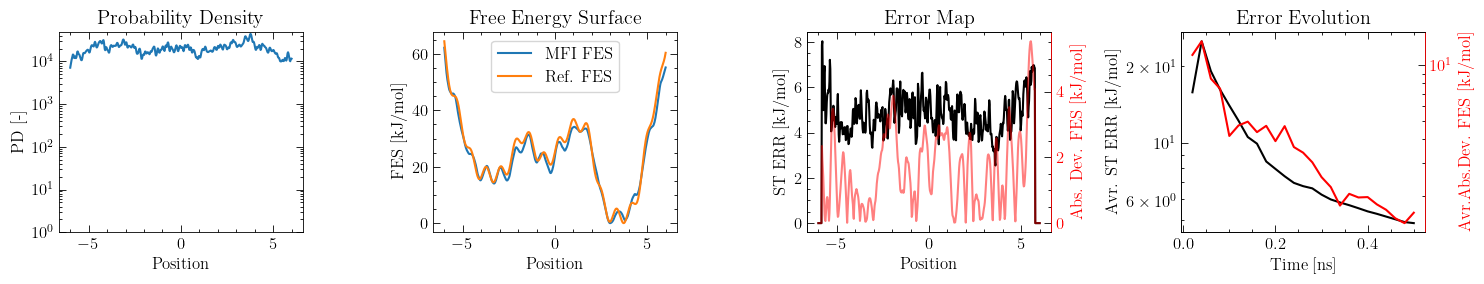

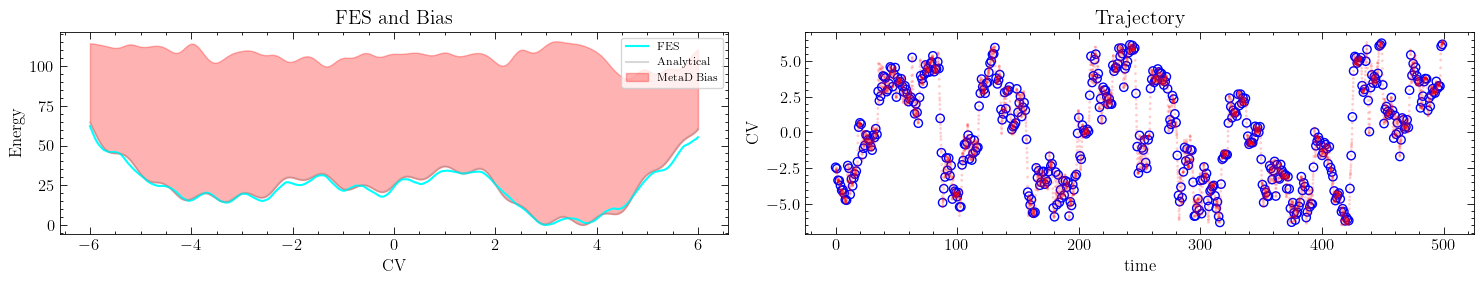

In [22]:
# Exploration Simulation used for MetaD stage
new_params = {**default_params}
new_params.update({"ID":"_expl_37", "len_error_list":25})

MFI_expl = MFI_class1D.MFI1D(**new_params)
MFI_expl.analyse_data()

print(F"Final Error: Aofe = {MFI_expl.Aofe:.4f}, AAD = {MFI_expl.AAD:.4f}")
print(f"MIN(FES+Bias) = {np.min(MFI_expl.FES + MFI_expl.Bias):.4f}, MIN(Z+Bias) = {np.min(MFI_expl.y + MFI_expl.Bias):.4f}")

MFI_expl.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI_expl.grid, fes=MFI_expl.FES, metad_bias=MFI_expl.Bias, position=MFI_expl.position, hills=MFI_expl.hills, y=MFI_expl.y )

t_expl, v_expl, aofe_expl, aad_expl = MFI_expl.Avr_Error_list[:,0], MFI_expl.Avr_Error_list[:,1], MFI_expl.Avr_Error_list[:,2], MFI_expl.Avr_Error_list[:, MFI_expl.aad_index]
force_terms_expl, sim_time_expl, fes_expl = MFI_expl.force_terms, MFI_expl.sim_time, MFI_expl.FES


### 2nd Stage - Run MetaD simulation

In [28]:
# Run 100 MetaD simulations
metad_sim_params = {**default_params}
metad_sim_params.update({"simulation_steps":900_000, "len_error_list":100, "save_error_progression":True, "save_results":True})#, "n_pos":47_500})
metad_sim_params.update({"base_forces":force_terms_expl, "base_time":sim_time_expl})

t_collection, aofe_collection, aad_collection = [], [], []

for i_sim in range(1,101):
    
    sim_ID = f"_metad_{i_sim}"
    metad_sim_params.update({"ID":sim_ID})
    
    if os.path.isfile(path_data + f"error_progression{sim_ID}.pkl"):
        print(f"Simulation {i_sim} (exists)", end=" | ")
        t, aofe, aad = lib1.load_pkl(path_data + f"error_progression{sim_ID}.pkl")
        
    else:
        print(f"Simulation {i_sim}", end=" | ")
        MFI_metad = MFI_class1D.MFI1D(**metad_sim_params)
        if not os.path.isfile(path_data + f"position{sim_ID}"): 
            MFI_metad.make_external_bias(FES=fes_expl)
            MFI_metad.run_simulation()
        MFI_metad.analyse_data()
        t, aofe, aad = MFI_metad.Avr_Error_list[:,0], MFI_metad.Avr_Error_list[:,2], MFI_metad.Avr_Error_list[:, MFI_metad.aad_index]

    t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad)        
    print(f"Final Error: Aofe = {aofe[-1]:.4f}, AAD = {aad[-1]:.4f}")
    if i_sim % 5 == 0: print(f"--- Mean of final AAD: {np.mean(aad_collection, axis=0)[-1]:.4f}")


Simulation 1 (exists) | Final Error: Aofe = 1.3702, AAD = 0.3257
Simulation 2 (exists) | Final Error: Aofe = 1.3794, AAD = 0.2714
Simulation 3 (exists) | Final Error: Aofe = 1.3705, AAD = 0.3441
Simulation 4 (exists) | Final Error: Aofe = 1.3682, AAD = 0.3572
Simulation 5 (exists) | Final Error: Aofe = 1.3811, AAD = 0.3208
--- Mean of final AAD: 0.3238
Simulation 6 (exists) | Final Error: Aofe = 1.3701, AAD = 0.3778
Simulation 7 (exists) | Final Error: Aofe = 1.3779, AAD = 0.3000
Simulation 8 (exists) | Final Error: Aofe = 1.3809, AAD = 0.3350
Simulation 9 (exists) | Final Error: Aofe = 1.3862, AAD = 0.4624
Simulation 10 (exists) | Final Error: Aofe = 1.3834, AAD = 0.2709
--- Mean of final AAD: 0.3365
Simulation 11 (exists) | Final Error: Aofe = 1.3795, AAD = 0.3710
Simulation 12 (exists) | Final Error: Aofe = 1.3883, AAD = 0.3926
Simulation 13 (exists) | Final Error: Aofe = 1.3647, AAD = 0.3843
Simulation 14 (exists) | Final Error: Aofe = 1.3821, AAD = 0.3141
Simulation 15 (exists) | 

Mean Final AAD: 0.3453 +- 0.0055


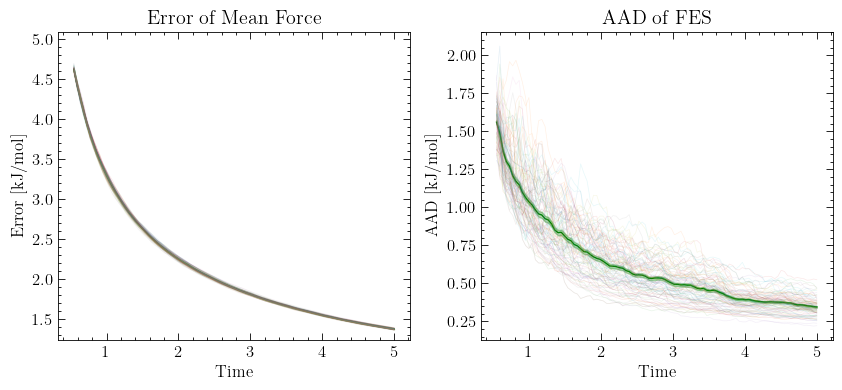

In [29]:
# Statistical Analysis of 100 MetaD simulations
t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
t = t_collection[0]

time_metad, mean_ofe_metad, ste_ofe_metad, mean_aad_metad, ste_aad_metad = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, 
                                                                                                        return_results=True, plot=False, plot_log=False)
plt.subplot(1,2,1) 
for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
plt.subplot(1,2,2)
for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)
print(f"Mean Final AAD: {mean_aad_metad[-1]:.4f} +- {ste_aad_metad[-1]:.4f}")
plt.show()

### 2nd Stage - Run 2x MetaD simulations

In [44]:
# Patching of 50x2 MetaD simulations
metadx2_sim_params = {**default_params}
metadx2_sim_params.update({"base_forces":force_terms_expl, "base_time":sim_time_expl})#, "base_forces_e_list":base_forces_e_list})

t_collection, aofe_collection, aad_collection = [], [], []

n_parallel = 2
parallel_efficiency = 0.75

for n_camp in range(1, 51):
    
    camp_ID = f"_metadx2_{n_camp}"
    new_params.update({"ID":camp_ID})
    
    if os.path.isfile(path_data + f"error_progression{camp_ID}.pkl"):
        print(f"Analysis {n_camp} (exists)", end=" | ")
        t, aofe, aad = lib1.load_pkl(path_data + f"error_progression{camp_ID}.pkl")
        
    else:   
        print(f"Analysis {n_camp}", end=" | ")

        MFI_metadx2 = MFI_class1D.MFI1D(**metadx2_sim_params)
        MFI_metadx2.make_external_bias(FES=fes_expl)
        mfi_parallel_x2 = MFI_metadx2.MFI_parallel(parent=MFI_metadx2, workers=n_parallel)

        camp_sim = 0
        for i_sim in range((n_camp-1)*n_parallel+1, (n_camp)*n_parallel+1):
            res = lib1.load_pkl(path_data + f"MFI_results_metad_{i_sim}.pkl")
            mfi_parallel_x2.sim[camp_sim].Avr_Error_list = res[1][1][:int(len(res[1][1])*parallel_efficiency)]
            mfi_parallel_x2.sim[camp_sim].forces_e_list = res[1][2][:int(len(res[1][2])*parallel_efficiency)]
            camp_sim += 1 

        mfi_parallel_x2.patch_simulations()
        t, aofe, aad = MFI_metadx2.Avr_Error_list[:,0], MFI_metadx2.Avr_Error_list[:,2], MFI_metadx2.Avr_Error_list[:, MFI_metadx2.aad_index]
        lib1.save_pkl(np.array([t, aofe, aad]), path_data + f"error_progression{camp_ID}.pkl")

    t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad)        
    print(f"Final Error: Aofe = {aofe[-1]:.4f}, AAD = {aad[-1]:.4f}")


Analysis 1 | Final Error: Aofe = 1.1430, AAD = 0.2529
Analysis 2 | Final Error: Aofe = 1.1421, AAD = 0.2850
Analysis 3 | Final Error: Aofe = 1.1432, AAD = 0.3487
Analysis 4 | Final Error: Aofe = 1.1434, AAD = 0.2587
Analysis 5 | Final Error: Aofe = 1.1511, AAD = 0.2351
Analysis 6 | Final Error: Aofe = 1.1480, AAD = 0.3089
Analysis 7 | Final Error: Aofe = 1.1394, AAD = 0.2372
Analysis 8 | Final Error: Aofe = 1.1389, AAD = 0.2673
Analysis 9 | Final Error: Aofe = 1.1502, AAD = 0.2798
Analysis 10 | Final Error: Aofe = 1.1412, AAD = 0.2874
Analysis 11 | Final Error: Aofe = 1.1427, AAD = 0.2906
Analysis 12 | Final Error: Aofe = 1.1453, AAD = 0.2271
Analysis 13 | Final Error: Aofe = 1.1476, AAD = 0.2858
Analysis 14 | Final Error: Aofe = 1.1392, AAD = 0.3693
Analysis 15 | Final Error: Aofe = 1.1427, AAD = 0.3463
Analysis 16 | Final Error: Aofe = 1.1472, AAD = 0.2430
Analysis 17 | Final Error: Aofe = 1.1455, AAD = 0.2832
Analysis 18 | Final Error: Aofe = 1.1437, AAD = 0.2683
Analysis 19 | Final

Mean Final AAD: 0.2874 +- 0.0060


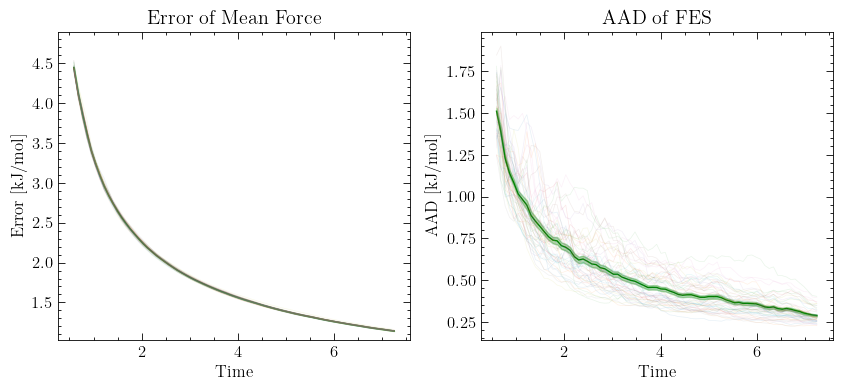

In [45]:
# Statistical Analysis of 50x2 MetaD simulations
t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
t = t_collection[0]

time_metadx2, mean_ofe_metadx2, ste_ofe_metadx2, mean_aad_metadx2, ste_aad_metadx2 = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, 
                                                                                                        return_results=True, plot=False, plot_log=False)
plt.subplot(1,2,1) 
for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
plt.subplot(1,2,2)
for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)
print(f"Mean Final AAD: {mean_aad_metadx2[-1]:.4f} +- {ste_aad_metadx2[-1]:.4f}")
plt.show()

### 2nd Stage - Run 3x MetaD simulations

In [102]:
os.chdir(path_notebook); reload(MFI_class1D); reload(lib1);

In [46]:
# Patching of 33x3 MetaD simulations
metadx3_sim_params = {**default_params}
metadx3_sim_params.update({"base_forces":force_terms_expl, "base_time":sim_time_expl})#, "base_forces_e_list":base_forces_e_list})

t_collection, aofe_collection, aad_collection = [], [], []

n_parallel = 3
parallel_efficiency = 0.667

for n_camp in range(1, 34):
    
    camp_ID = f"_metadx3_{n_camp}"
    new_params.update({"ID":camp_ID})
    
    if os.path.isfile(path_data + f"error_progression{camp_ID}.pkl"):
        print(f"Analysis {n_camp} (exists)", end=" | ")
        t, aofe, aad = lib1.load_pkl(path_data + f"error_progression{camp_ID}.pkl")
        
    else:   
        print(f"Analysis {n_camp}", end=" | ")

        MFI_metadx3 = MFI_class1D.MFI1D(**metadx3_sim_params)
        MFI_metadx3.make_external_bias(FES=fes_expl)
        mfi_parallel_x3 = MFI_metadx3.MFI_parallel(parent=MFI_metadx3, workers=n_parallel)

        camp_sim = 0
        for i_sim in range((n_camp-1)*n_parallel+1, (n_camp)*n_parallel+1):
            res = lib1.load_pkl(path_data + f"MFI_results_metad_{i_sim}.pkl")
            mfi_parallel_x3.sim[camp_sim].Avr_Error_list = res[1][1][:int(len(res[1][1])*parallel_efficiency)]
            mfi_parallel_x3.sim[camp_sim].forces_e_list = res[1][2][:int(len(res[1][2])*parallel_efficiency)]
            camp_sim += 1 

        mfi_parallel_x3.patch_simulations()
        t, aofe, aad = MFI_metadx3.Avr_Error_list[:,0], MFI_metadx3.Avr_Error_list[:,2], MFI_metadx3.Avr_Error_list[:, MFI_metadx3.aad_index]
        lib1.save_pkl(np.array([t, aofe, aad]), path_data + f"error_progression{camp_ID}.pkl")

    t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad)        
    print(f"Final Error: Aofe = {aofe[-1]:.4f}, AAD = {aad[-1]:.4f}")


Analysis 1 | Final Error: Aofe = 1.0027, AAD = 0.2654
Analysis 2 | Final Error: Aofe = 0.9987, AAD = 0.2997
Analysis 3 | Final Error: Aofe = 1.0048, AAD = 0.2345
Analysis 4 | Final Error: Aofe = 1.0077, AAD = 0.2473
Analysis 5 | Final Error: Aofe = 0.9969, AAD = 0.2195
Analysis 6 | Final Error: Aofe = 1.0057, AAD = 0.2493
Analysis 7 | Final Error: Aofe = 1.0062, AAD = 0.2548
Analysis 8 | Final Error: Aofe = 1.0009, AAD = 0.2190
Analysis 9 | Final Error: Aofe = 1.0023, AAD = 0.3267
Analysis 10 | Final Error: Aofe = 1.0020, AAD = 0.3312
Analysis 11 | Final Error: Aofe = 1.0037, AAD = 0.2711
Analysis 12 | Final Error: Aofe = 1.0012, AAD = 0.2296
Analysis 13 | Final Error: Aofe = 0.9952, AAD = 0.2768
Analysis 14 | Final Error: Aofe = 0.9978, AAD = 0.3008
Analysis 15 | Final Error: Aofe = 0.9975, AAD = 0.2377
Analysis 16 | Final Error: Aofe = 0.9992, AAD = 0.2761
Analysis 17 | Final Error: Aofe = 1.0064, AAD = 0.2620
Analysis 18 | Final Error: Aofe = 1.0050, AAD = 0.3640
Analysis 19 | Final

Mean Final AAD: 0.2659 +- 0.0073


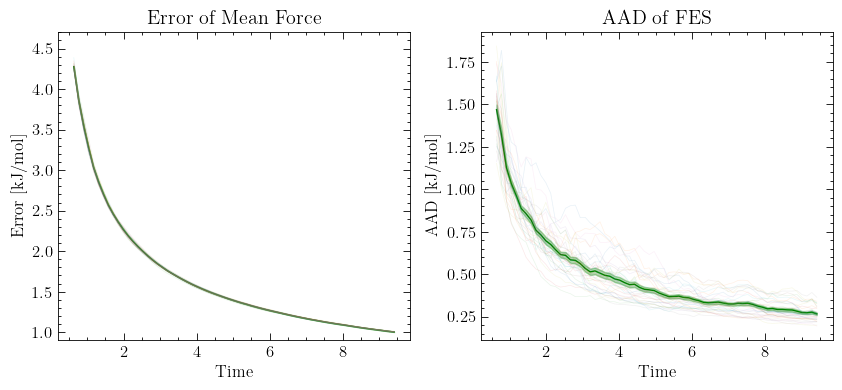

In [47]:
# Statistical Analysis of 33x3 MetaD simulations
t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
t = t_collection[0]

time_metadx3, mean_ofe_metadx3, ste_ofe_metadx3, mean_aad_metadx3, ste_aad_metadx3 = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, 
                                                                                                        return_results=True, plot=False, plot_log=False)
plt.subplot(1,2,1) 
for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
plt.subplot(1,2,2)
for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)
print(f"Mean Final AAD: {mean_aad_metadx3[-1]:.4f} +- {ste_aad_metadx3[-1]:.4f}")
plt.show()

### 2nd Stage - Run 4x MetaD simulations

In [48]:
# Patching of 25x4 MetaD simulations
metadx4_sim_params = {**default_params}
metadx4_sim_params.update({"base_forces":force_terms_expl, "base_time":sim_time_expl})#, "base_forces_e_list":base_forces_e_list})

t_collection, aofe_collection, aad_collection = [], [], []

n_parallel = 4
parallel_efficiency = 0.5

for n_camp in range(1, 26):
    
    camp_ID = f"_metadx4_{n_camp}"
    new_params.update({"ID":camp_ID})
    
    if os.path.isfile(path_data + f"error_progression{camp_ID}.pkl"):
        print(f"Analysis {n_camp} (exists)", end=" | ")
        t, aofe, aad = lib1.load_pkl(path_data + f"error_progression{camp_ID}.pkl")
        
    else:   
        print(f"Analysis {n_camp}", end=" | ")

        MFI_metadx4 = MFI_class1D.MFI1D(**metadx4_sim_params)
        MFI_metadx4.make_external_bias(FES=fes_expl)
        mfi_parallel_x4 = MFI_metadx4.MFI_parallel(parent=MFI_metadx4, workers=n_parallel)

        camp_sim = 0
        for i_sim in range((n_camp-1)*n_parallel+1, (n_camp)*n_parallel+1):
            res = lib1.load_pkl(path_data + f"MFI_results_metad_{i_sim}.pkl")
            mfi_parallel_x4.sim[camp_sim].Avr_Error_list = res[1][1][:int(len(res[1][1])*parallel_efficiency)]
            mfi_parallel_x4.sim[camp_sim].forces_e_list = res[1][2][:int(len(res[1][2])*parallel_efficiency)]
            camp_sim += 1 

        mfi_parallel_x4.patch_simulations()
        t, aofe, aad = MFI_metadx4.Avr_Error_list[:,0], MFI_metadx4.Avr_Error_list[:,2], MFI_metadx4.Avr_Error_list[:, MFI_metadx4.aad_index]
        lib1.save_pkl(np.array([t, aofe, aad]), path_data + f"error_progression{camp_ID}.pkl")

    t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad)        
    print(f"Final Error: Aofe = {aofe[-1]:.4f}, AAD = {aad[-1]:.4f}")



Analysis 1 | Final Error: Aofe = 0.9952, AAD = 0.2624
Analysis 2 | Final Error: Aofe = 0.9981, AAD = 0.2536
Analysis 3 | Final Error: Aofe = 1.0046, AAD = 0.3612
Analysis 4 | Final Error: Aofe = 0.9953, AAD = 0.2322
Analysis 5 | Final Error: Aofe = 1.0010, AAD = 0.2650
Analysis 6 | Final Error: Aofe = 1.0038, AAD = 0.2642
Analysis 7 | Final Error: Aofe = 1.0018, AAD = 0.3019
Analysis 8 | Final Error: Aofe = 1.0001, AAD = 0.3402
Analysis 9 | Final Error: Aofe = 1.0011, AAD = 0.2442
Analysis 10 | Final Error: Aofe = 0.9942, AAD = 0.3041
Analysis 11 | Final Error: Aofe = 0.9930, AAD = 0.2741
Analysis 12 | Final Error: Aofe = 0.9955, AAD = 0.2910
Analysis 13 | Final Error: Aofe = 1.0009, AAD = 0.2899
Analysis 14 | Final Error: Aofe = 0.9997, AAD = 0.3389
Analysis 15 | Final Error: Aofe = 1.0076, AAD = 0.3156
Analysis 16 | Final Error: Aofe = 0.9981, AAD = 0.2282
Analysis 17 | Final Error: Aofe = 0.9995, AAD = 0.2758
Analysis 18 | Final Error: Aofe = 0.9992, AAD = 0.2274
Analysis 19 | Final

Mean Final AAD: 0.2845 +- 0.0095


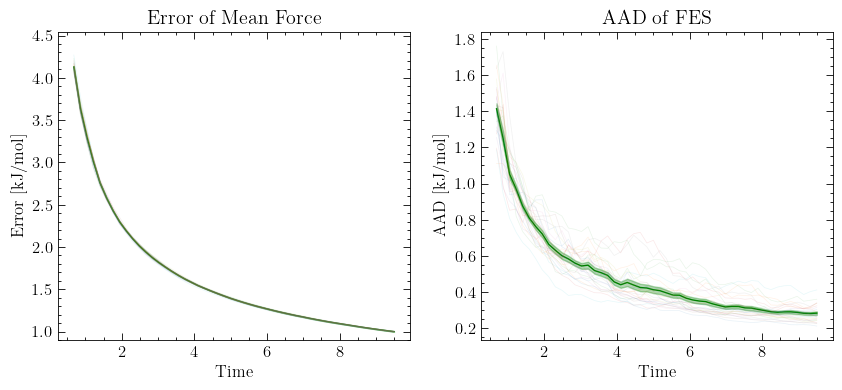

In [49]:
# Statistical Analysis of 25x4 MetaD simulations
t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
t = t_collection[0]

time_metadx4, mean_ofe_metadx4, ste_ofe_metadx4, mean_aad_metadx4, ste_aad_metadx4 = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, 
                                                                                                        return_results=True, plot=False, plot_log=False)
plt.subplot(1,2,1) 
for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
plt.subplot(1,2,2)
for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)
print(f"Mean Final AAD: {mean_aad_metadx4[-1]:.4f} +- {ste_aad_metadx4[-1]:.4f}")
plt.show()

### 2nd Stage 6x MetaD simulation

In [50]:
# Patching of 16x6 MetaD simulations
metadx6_sim_params = {**default_params}
metadx6_sim_params.update({"base_forces":force_terms_expl, "base_time":sim_time_expl})#, "base_forces_e_list":base_forces_e_list})

t_collection, aofe_collection, aad_collection = [], [], []

n_parallel = 6
parallel_efficiency = 0.4

for n_camp in range(1, 17):
    
    camp_ID = f"_metadx6_{n_camp}"
    new_params.update({"ID":camp_ID})
    
    if os.path.isfile(path_data + f"error_progression{camp_ID}.pkl"):
        print(f"Analysis {n_camp} (exists)", end=" | ")
        t, aofe, aad = lib1.load_pkl(path_data + f"error_progression{camp_ID}.pkl")
        
    else:   
        print(f"Analysis {n_camp}", end=" | ")

        MFI_metadx6 = MFI_class1D.MFI1D(**metadx6_sim_params)
        MFI_metadx6.make_external_bias(FES=fes_expl)
        mfi_parallel_x6 = MFI_metadx6.MFI_parallel(parent=MFI_metadx6, workers=n_parallel)

        camp_sim = 0
        for i_sim in range((n_camp-1)*n_parallel+1, (n_camp)*n_parallel+1):
            res = lib1.load_pkl(path_data + f"MFI_results_metad_{i_sim}.pkl")
            mfi_parallel_x6.sim[camp_sim].Avr_Error_list = res[1][1][:int(len(res[1][1])*parallel_efficiency)]
            mfi_parallel_x6.sim[camp_sim].forces_e_list = res[1][2][:int(len(res[1][2])*parallel_efficiency)]
            camp_sim += 1 

        mfi_parallel_x6.patch_simulations()
        t, aofe, aad = MFI_metadx6.Avr_Error_list[:,0], MFI_metadx6.Avr_Error_list[:,2], MFI_metadx6.Avr_Error_list[:, MFI_metadx6.aad_index]
        lib1.save_pkl(np.array([t, aofe, aad]), path_data + f"error_progression{camp_ID}.pkl")

    t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad)        
    print(f"Final Error: Aofe = {aofe[-1]:.4f}, AAD = {aad[-1]:.4f}")


Analysis 1 | Final Error: Aofe = 0.9145, AAD = 0.2470
Analysis 2 | Final Error: Aofe = 0.9195, AAD = 0.2635
Analysis 3 | Final Error: Aofe = 0.9176, AAD = 0.2621
Analysis 4 | Final Error: Aofe = 0.9162, AAD = 0.2617
Analysis 5 | Final Error: Aofe = 0.9190, AAD = 0.3106
Analysis 6 | Final Error: Aofe = 0.9190, AAD = 0.2610
Analysis 7 | Final Error: Aofe = 0.9080, AAD = 0.2646
Analysis 8 | Final Error: Aofe = 0.9115, AAD = 0.2872
Analysis 9 | Final Error: Aofe = 0.9182, AAD = 0.2819
Analysis 10 | Final Error: Aofe = 0.9229, AAD = 0.2320
Analysis 11 | Final Error: Aofe = 0.9183, AAD = 0.2739
Analysis 12 | Final Error: Aofe = 0.9164, AAD = 0.2719
Analysis 13 | Final Error: Aofe = 0.9225, AAD = 0.3076
Analysis 14 | Final Error: Aofe = 0.9164, AAD = 0.2059
Analysis 15 | Final Error: Aofe = 0.9138, AAD = 0.2907
Analysis 16 | Final Error: Aofe = 0.9190, AAD = 0.2759


Mean Final AAD: 0.2659 +- 0.0073


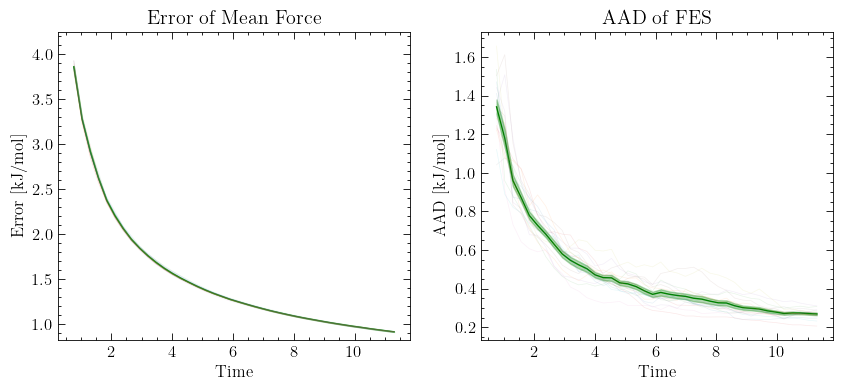

In [51]:
# Statistical Analysis of 16x6 MetaD simulations
t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
t = t_collection[0]

time_metadx6, mean_ofe_metadx6, ste_ofe_metadx6, mean_aad_metadx6, ste_aad_metadx6 = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, 
                                                                                                        return_results=True, plot=False, plot_log=False)
plt.subplot(1,2,1) 
for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
plt.subplot(1,2,2)
for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)
print(f"Mean Final AAD: {mean_aad_metadx3[-1]:.4f} +- {ste_aad_metadx3[-1]:.4f}")
plt.show()

### 2nd Stage 10x MetaD simulation

In [52]:
# Patching of 10x10 MetaD simulations
metadx10_sim_params = {**default_params}
metadx10_sim_params.update({"base_forces":force_terms_expl, "base_time":sim_time_expl})#, "base_forces_e_list":base_forces_e_list})

t_collection, aofe_collection, aad_collection = [], [], []

n_parallel = 10
parallel_efficiency = 0.3

for n_camp in range(1, 11):
    
    camp_ID = f"_metadx10_{n_camp}"
    new_params.update({"ID":camp_ID})
    
    if os.path.isfile(path_data + f"error_progression{camp_ID}.pkl"):
        print(f"Analysis {n_camp} (exists)", end=" | ")
        t, aofe, aad = lib1.load_pkl(path_data + f"error_progression{camp_ID}.pkl")
        
    else:   
        print(f"Analysis {n_camp}", end=" | ")

        MFI_metadx10 = MFI_class1D.MFI1D(**metadx10_sim_params)
        MFI_metadx10.make_external_bias(FES=fes_expl)
        mfi_parallel_x10 = MFI_metadx10.MFI_parallel(parent=MFI_metadx10, workers=n_parallel)

        camp_sim = 0
        for i_sim in range((n_camp-1)*n_parallel+1, (n_camp)*n_parallel+1):
            res = lib1.load_pkl(path_data + f"MFI_results_metad_{i_sim}.pkl")
            mfi_parallel_x10.sim[camp_sim].Avr_Error_list = res[1][1][:int(len(res[1][1])*parallel_efficiency)]
            mfi_parallel_x10.sim[camp_sim].forces_e_list = res[1][2][:int(len(res[1][2])*parallel_efficiency)]
            camp_sim += 1 

        mfi_parallel_x10.patch_simulations()
        t, aofe, aad = MFI_metadx10.Avr_Error_list[:,0], MFI_metadx10.Avr_Error_list[:,2], MFI_metadx10.Avr_Error_list[:, MFI_metadx10.aad_index]
        lib1.save_pkl(np.array([t, aofe, aad]), path_data + f"error_progression{camp_ID}.pkl")

    t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad)        
    print(f"Final Error: Aofe = {aofe[-1]:.4f}, AAD = {aad[-1]:.4f}")


Analysis 1 | Final Error: Aofe = 0.8261, AAD = 0.2119
Analysis 2 | Final Error: Aofe = 0.8220, AAD = 0.2422
Analysis 3 | Final Error: Aofe = 0.8254, AAD = 0.2751
Analysis 4 | Final Error: Aofe = 0.8188, AAD = 0.2368
Analysis 5 | Final Error: Aofe = 0.8215, AAD = 0.2462
Analysis 6 | Final Error: Aofe = 0.8259, AAD = 0.2620
Analysis 7 | Final Error: Aofe = 0.8227, AAD = 0.2667
Analysis 8 | Final Error: Aofe = 0.8279, AAD = 0.2462
Analysis 9 | Final Error: Aofe = 0.8198, AAD = 0.2113
Analysis 10 | Final Error: Aofe = 0.8204, AAD = 0.2380


Mean Final AAD: 0.2659 +- 0.0073


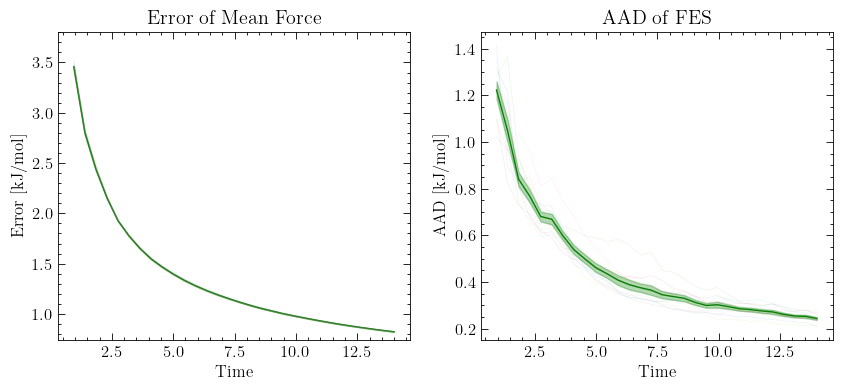

In [53]:
# Statistical Analysis of 10x10 MetaD simulations
t_collection, aofe_collection, aad_collection = np.array(t_collection), np.array(aofe_collection), np.array(aad_collection)
t = t_collection[0]

time_metadx10, mean_ofe_metadx10, ste_ofe_metadx10, mean_aad_metadx10, ste_aad_metadx10 = lib1.get_mean_ste_of_n_error_prog(time=t, error_collection=aofe_collection, error_collection_2=aad_collection, 
                                                                                                        return_results=True, plot=False, plot_log=False)
plt.subplot(1,2,1) 
for i in range(len(aofe_collection)): plt.plot(t, aofe_collection[i], linewidth=0.5, alpha=0.1)
plt.subplot(1,2,2)
for i in range(len(aad_collection)): plt.plot(t, aad_collection[i], linewidth=0.5, alpha=0.1)
print(f"Mean Final AAD: {mean_aad_metadx3[-1]:.4f} +- {ste_aad_metadx3[-1]:.4f}")
plt.show()

### Compare Convergence of Simulations

In [42]:
# import gaussian_filter
from scipy.signal import savgol_filter

def sf(data, window_length=None, polyorder=None):
    # if window_length is None: window_length = max(5, int(len(data)/20))    
    # if polyorder is None: polyorder = 2
    # return savgol_filter(data, window_length, polyorder)
    return data

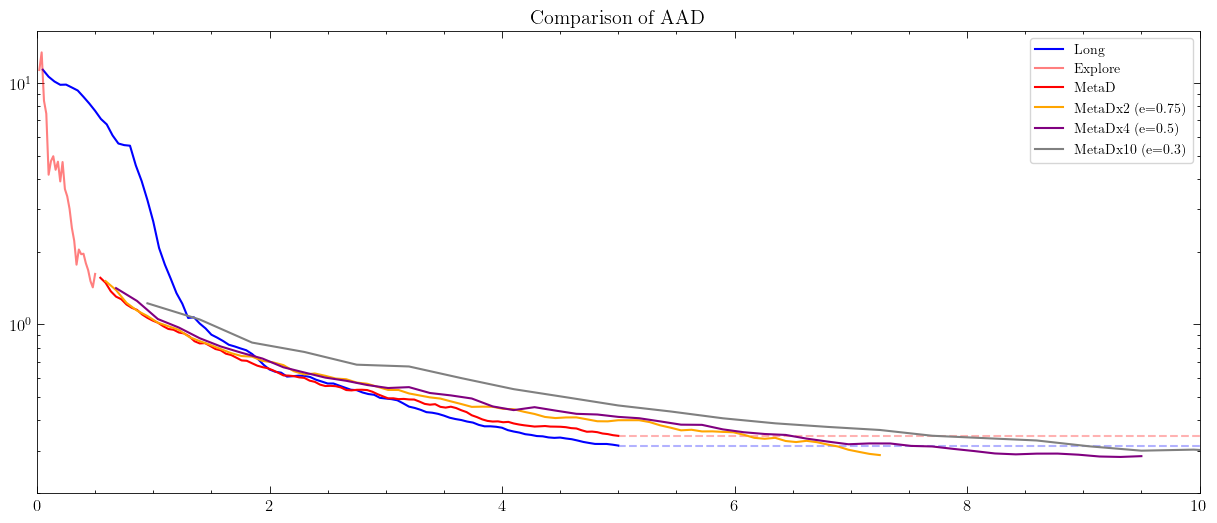

In [70]:
plt.figure(figsize=(15,6))
# plt.figure(figsize=(20,4))
# # time_metad, mean_ofe_metad, ste_ofe_metad, mean_aad_metad, ste_aad_metad

# plt.subplot(1,2,1)
# plt.plot(time_long, mean_ofe_long, label="Long", color="blue")
# # plt.plot(time_expl, mean_ofe_expl, label="Explore", color="red", alpha=0.5)
# plt.plot(t_expl, aofe_expl, label="Explore", color="red", alpha=0.5)
# plt.plot(time_metad, mean_ofe_metad, label="MetaD", color="red")
# plt.plot(time_metadx2, mean_ofe_metadx2, label="MetaDx2 (e=0.75)", color="orange")
# # plt.plot(time_metadx3, mean_ofe_metadx3, label="MetaDx3(e=0.67)", color="green")
# plt.plot(time_metadx4, mean_ofe_metadx4, label="MetaDx4 (e=0.5)", color="purple")
# # plt.plot(time_metadx6, mean_ofe_metadx6, label="MetaDx6 (e=0.4)", color="aquamarine")
# plt.plot(time_metadx10, mean_ofe_metadx10, label="MetaDx10 (e=0.3)", color="grey")
# plt.legend(fontsize=10); plt.yscale("log"); plt.title("Comparison of Aofe")

# plt.subplot(1,2,2)
plt.plot(time_long, sf(mean_aad_long), label="Long", color="blue"); plt.plot([time_long[-1],10], [mean_aad_long[-1],mean_aad_long[-1]], color="blue", linestyle="--", alpha=0.3)
# plt.plot(time_expl, mean_aad_expl, label="Explore", color="red", alpha=0.5)
plt.plot(t_expl, sf(aad_expl), label="Explore", color="red", alpha=0.5)
plt.plot(time_metad, sf(mean_aad_metad), label="MetaD", color="red"); plt.plot([time_metad[-1],10], [mean_aad_metad[-1],mean_aad_metad[-1]], color="red", linestyle="--", alpha=0.3)
plt.plot(time_metadx2, sf(mean_aad_metadx2), label="MetaDx2 (e=0.75)", color="orange")
# plt.plot(time_metadx3, sf(mean_aad_metadx3), label="MetaDx3 (e=0.67)", color="green")
plt.plot(time_metadx4, sf(mean_aad_metadx4), label="MetaDx4 (e=0.5)", color="purple")
# plt.plot(time_metadx6, sf(mean_aad_metadx6), label="MetaDx6 (e=0.4)", color="aquamarine")
plt.plot(time_metadx10, mean_aad_metadx10, label="MetaDx10 (e=0.3)", color="grey")

# plt.ylim(0.38, 3)
plt.xlim(0, 10)
plt.yscale("log"); 
plt.legend(fontsize=10); plt.title("Comparison of AAD"); plt.show()

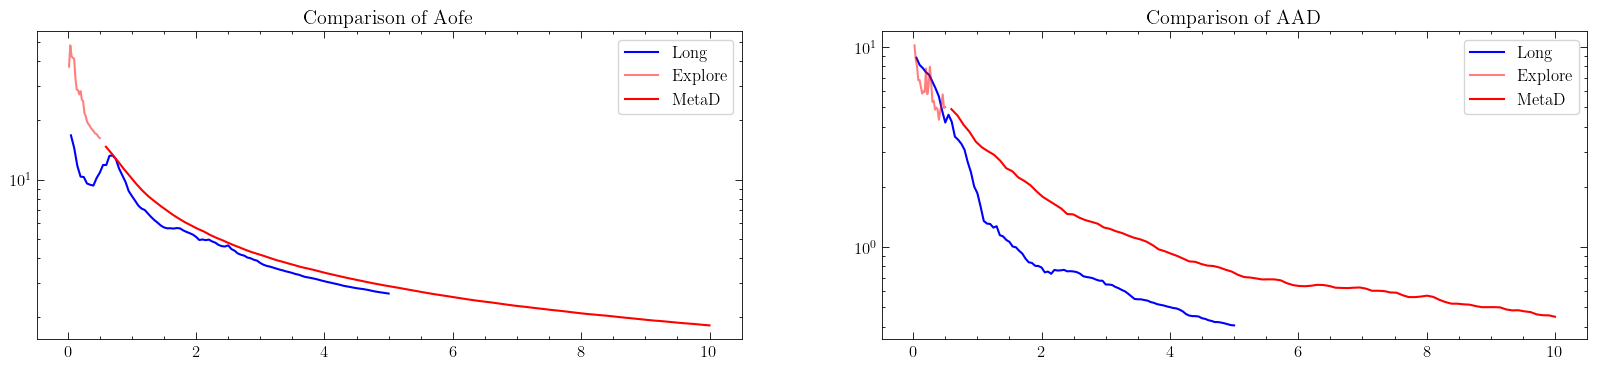

In [23]:
plt.figure(figsize=(20,4))
# time_metad, mean_ofe_metad, ste_ofe_metad, mean_aad_metad, ste_aad_metad

plt.subplot(1,2,1)
plt.plot(time_long, mean_ofe_long, label="Long", color="blue")
# plt.plot(time_expl, mean_ofe_expl, label="Explore", color="red", alpha=0.5)
plt.plot(t_expl, aofe_expl, label="Explore", color="red", alpha=0.5)
plt.plot(time_metad, mean_ofe_metad, label="MetaD", color="red")
# plt.plot(time_metadx2, mean_ofe_metadx2, label="MetaDx2", color="orange")
# plt.plot(time_metadx3, mean_ofe_metadx3, label="MetaDx3", color="green")
# plt.plot(time_metadx4, mean_ofe_metadx4, label="MetaDx4", color="purple")
# plt.plot(time_metadx6, mean_ofe_metadx6, label="MetaDx6", color="aquamarine")
# plt.plot(time_metadx10, mean_ofe_metadx10, label="MetaDx6", color="grey")
plt.legend(); plt.yscale("log"); plt.title("Comparison of Aofe")

plt.subplot(1,2,2)
plt.plot(time_long, mean_aad_long, label="Long", color="blue"); #plt.plot([t_long[-1],t1x4[-1]], [aad_long[-1],aad_long[-1]], color="blue", linestyle="--", alpha=0.3)
# plt.plot(time_expl, mean_aad_expl, label="Explore", color="red", alpha=0.5)
plt.plot(t_expl, aad_expl, label="Explore", color="red", alpha=0.5)
plt.plot(time_metad, mean_aad_metad, label="MetaD", color="red");#plt.plot([t1x1[-1],t1x4[-1]], [aad1x1[-1],aad1x1[-1]], color="red", linestyle="--", alpha=0.3)
# plt.plot(time_metadx2, mean_aad_metadx2, label="MetaDx2", color="orange")
# plt.plot(time_metadx3, mean_aad_metadx3, label="MetaDx3", color="green")
# plt.plot(time_metadx4, mean_aad_metadx4, label="MetaDx4", color="purple")
# plt.plot(time_metadx6, mean_aad_metadx6, label="MetaDx6", color="aquamarine")
# plt.plot(time_metadx10, mean_aad_metadx10, label="MetaDx6", color="grey")

# plt.ylim(0.38, 0.6)
plt.legend(); plt.yscale("log"); plt.title("Comparison of AAD"); plt.show()
